In [3]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import thinkstats2
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')



from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

PI2 = np.pi * 2

%matplotlib inline

1번. piano_listen.wav를 read하고 소리를 들어보세요.  

답: thinkdsp에서 WAV file을 읽고 return해주는 read_wave함수를 제공하므로 이 함수를 사용해서 piano_listen.wav를 read하고, make_audio로 소리를 들어볼 수 있다.

In [4]:
wave = thinkdsp.read_wave('piano_listen.wav')
wave.normalize()
wave.make_audio()


2번. piano_listen.wav의 framerate은?  

답: read_wave 함수가 정의된 것을 보면  

def read_wave(filename):  
&nbsp;&nbsp;&nbsp;&nbsp;fp=wave.open(filename,'r')   
&nbsp;&nbsp;&nbsp;&nbsp;nchannels=fp.getnchannels()  
&nbsp;&nbsp;&nbsp;&nbsp;framerate=fp.getframerate()  
&nbsp;&nbsp;&nbsp;&nbsp;....이하 생략  
    
으로 4행에 framerate = fp.getframerate() 즉, 해당 file의 framerate를 반환하는 함수 getframerate()와 반환 값을 저장하는 framerate가 있는 것을 볼 수 있다.   

즉, 해당 wav file의 framerate 값을 출력해본 결과 44100 per sec임을 알 수 있다.


In [5]:
thinkdsp.read_wave('piano_listen.wav').framerate

44100

3. piano_listen에서는 몇 개의 음계가 포함되어 있는가?

&nbsp;&nbsp;&nbsp;답:각 segement 별로 spectrum을 plot하는 STFT(short-time Fourie transform)를 visualize 한 아래의 spectogram으로 보면,   
1. 0~1sec사이에 첫 번째 음계 
2. 1.9~2.5sec사이에서 두 번째 음계
3. 3.1~3.5sec사이에서 세 번째 음계
4. 4.5~4.9sec사이에서 네 번째 음계
5. 6~6.4sec 사이에서 다섯 번째 음계  

즉 총 5개의 음계가 나타남을 알 수 있다. 

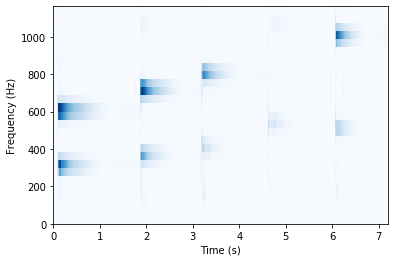

In [6]:
spectro = wave.make_spectrogram(seg_length=1024)
spectro.plot(high=1200)
thinkplot.config(xlabel='Time (s)', 
                 ylabel='Frequency (Hz)',
                 xlim=[wave.start, wave.end])

4. spectrum 분석을 이용하여 piano_listen에 포함되어 있는 음을 모두 순서대로 찾으세요.  

&nbsp;&nbsp;&nbsp;답: 레(D4),파(F4),솔(G4),도(C5),시(B4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1)첫 음 찾기  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;첫 번째 음부분을 짤라 들어보자 (0~1sec)

In [7]:
start = 0.0
duration = 1.0
segment = wave.segment(start,duration)
spectrum = segment.make_spectrum()
segment.make_audio()


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;해당 wav file의 spectrum은 아래와 같다

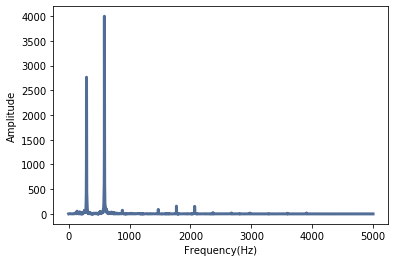

In [8]:
spectrum.plot(5000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;많은 frequency component들 중 해당하는 피아노 음을 알기위해서는 fundamental frequency를 찾아야 하므로 zoom해보자

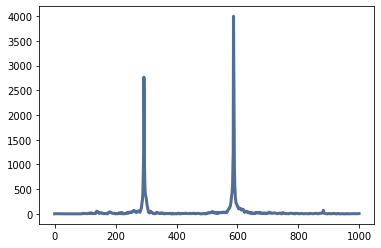

In [9]:
spectrum = segment.make_spectrum()
spectrum.plot(1000)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;spectrum에서 가장 높은 point들을 frequency 와 함께 내림차순으로 출력해보자

In [10]:
spectrum.peaks()[:10]

[(3998.1921162522453, 587.0),
 (2879.386723046165, 588.0),
 (2765.012579754307, 293.0),
 (2155.5582581784256, 294.0),
 (1407.7994141651905, 589.0),
 (1254.206069258194, 292.0),
 (1252.527408650356, 586.0),
 (959.8377010111794, 590.0),
 (931.4969286089096, 295.0),
 (883.4840570583592, 585.0)]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;fundamental frequency는 293Hz, dominant frequency는 587Hz이다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;두 주파수는 각각 D4, D5에 해당하며 4옥타브 레, 5옥타브 레에 해당한다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;따라서 첫 번째 음은 레(D4)에 해당한다.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2)두번 째 음 찾기  
(이후 spectrum을 이용해 음을 찾는 과정은 첫 번째 음부분을 찾는 과정과 똑같기 때문에 설명은 생략하고 코드만 적었습니다.)

In [11]:
start = 1.3
duration = 1.6
segment = wave.segment(start,duration)
spectrum = segment.make_spectrum()
segment.make_audio()

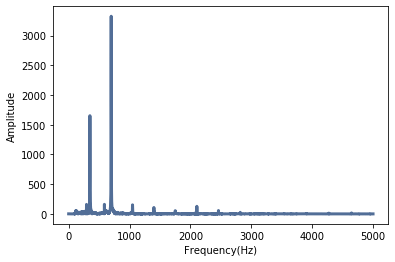

In [12]:
spectrum.plot(5000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

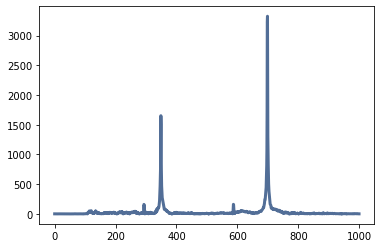

In [13]:
spectrum = segment.make_spectrum()
spectrum.plot(1000)

In [14]:
spectrum.peaks()[:10]

[(3325.090412096772, 698.75),
 (3228.536149448036, 698.125),
 (2016.178553968014, 699.375),
 (1726.885855468121, 697.5),
 (1651.9821890052497, 348.75),
 (1506.826826576975, 349.375),
 (1302.0128673609463, 700.0),
 (1203.4585873048554, 348.125),
 (1064.3540696905825, 696.875),
 (992.5810007101403, 700.625)]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;fundamental frequency는 349Hz, dominant frequency는 698Hz이다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;두 주파수는 각각 F4, F5에 해당하며 4옥타브 파, 5옥타브 파에 해당한다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;따라서 두 번째 음은 파(F4)에 해당한다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3)세 번째 음찾기

In [15]:
start = 3.2
duration = 1.3
segment = wave.segment(start,duration)
spectrum = segment.make_spectrum()
segment.make_audio()

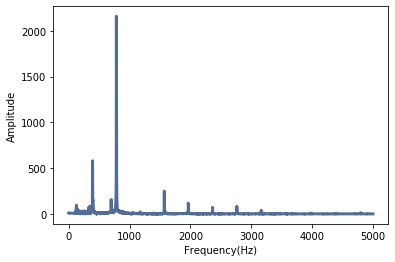

In [16]:
spectrum.plot(5000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

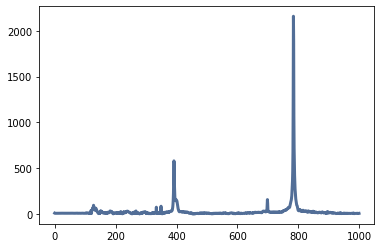

In [17]:
spectrum = segment.make_spectrum()
spectrum.plot(1000)

In [18]:
spectrum.peaks()[:10]

[(2157.930834106551, 783.8461538461538),
 (1886.8169611336912, 784.6153846153845),
 (1261.241628692828, 783.076923076923),
 (1054.8372086567624, 785.3846153846154),
 (713.3093746444009, 786.1538461538461),
 (680.0628572309649, 782.3076923076923),
 (579.361056029049, 391.5384615384615),
 (556.7698025085346, 392.30769230769226),
 (534.1061966772086, 786.9230769230769),
 (462.4779684990949, 781.5384615384614)]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;fundamental frequency는 391Hz, dominant frequency는 783Hz이다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;두 주파수는 각각 G4, G5에 해당하며 4옥타브 솔, 5옥타브 솔에 해당한다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;따라서 세 번째 음은 솔(G4)에 해당한다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4)네 번째 음을 찾기

In [19]:
start = 4.6
duration = 0.9
segment = wave.segment(start,duration)
spectrum = segment.make_spectrum()
segment.make_audio()

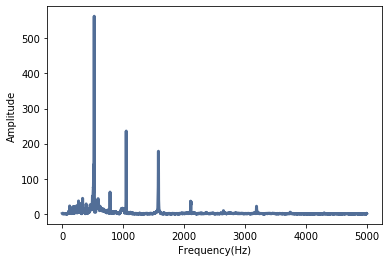

In [20]:
spectrum.plot(5000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

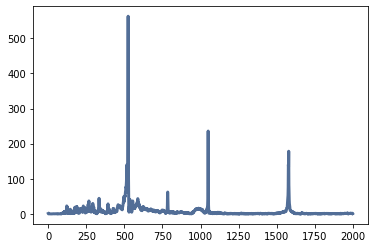

In [21]:
spectrum = segment.make_spectrum()
spectrum.plot(2000)

In [22]:
spectrum.peaks()[:10]

[(562.6988706000893, 524.4444444444445),
 (465.77781897835735, 523.3333333333334),
 (238.1987027825933, 525.5555555555555),
 (235.8620552695093, 1050.0),
 (227.48755134150744, 522.2222222222223),
 (178.68131677578307, 1048.888888888889),
 (178.43050400586054, 1578.888888888889),
 (140.30015537388869, 1576.6666666666667),
 (140.26107415557132, 516.6666666666667),
 (134.42674650483946, 515.5555555555555)]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;fundamental frequency이자 dominatnt frequency 는523Hz이다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;이 주파수는 각각 C5로 5옥타브 도에 해당한다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;따라서 네 번째 음은 도(C5)에 해당한다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5)다섯 번째 음찾기

In [23]:
start = 5.8
duration = 1.1
segment = wave.segment(start,duration)
spectrum = segment.make_spectrum()
segment.make_audio()

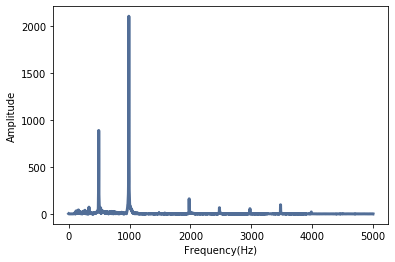

In [24]:
spectrum.plot(5000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

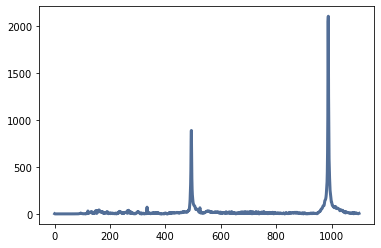

In [25]:
spectrum = segment.make_spectrum()
spectrum.plot(1100)

In [26]:
spectrum.peaks()[:10]

[(2104.6369572804833, 988.1818181818181),
 (2046.6147762608396, 987.2727272727273),
 (1257.912247101171, 989.090909090909),
 (1039.48121739364, 986.3636363636364),
 (888.5372449414729, 493.6363636363636),
 (837.5851352008224, 990.0),
 (765.6734521379914, 492.7272727272727),
 (654.134466619157, 985.4545454545454),
 (626.4029499808105, 494.5454545454545),
 (585.0813905445859, 990.9090909090909)]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;fundamental frequency는 493Hz, dominant frequency는 987Hz이다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;두 주파수는 각각 B4, B5에 해당하며 4옥타브 시, 5옥타브 시에 해당한다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;따라서 다섯 번째 음은 시(B4)에 해당한다.

5. autocorrelation을 이용하여 piano_listen에 포함되어 있는 음을 모두 순서대로 찾으세요.

&nbsp;&nbsp;&nbsp;답: 레(D4),파(F4),솔(G4),도(C5),시(B4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;autocorrelation을 이용하여 fudamental frequency를 파악하는 estimate_fundamental 함수를 사용하여 찾아보자

In [27]:
from autocorr import autocorr

In [28]:
def estimate_fundamental(segment, low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1)첫 음 찾기  

In [29]:
duration = 0.9
segment = wave.segment(start=0.001, duration=duration)
freq = estimate_fundamental(segment)
freq

295.9731543624161

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;피아노 음계 주파수에서 D4(레)가 293Hz에 해당하므로 esimate_fundamental결과 나온 295Hz와 가까우므로 첫 음은 D4이다

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2)두 번째 음 찾기  

In [30]:
duration = 0.9
segment = wave.segment(start=1.8, duration=duration)
freq = estimate_fundamental(segment)
freq

350.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;피아노 음계 주파수에서 F4(파)가 349Hz에 해당하므로 esimate_fundamental결과 나온 350Hz와 가까우므로 두 번째 음은 F4이다

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3)세 번째 음 찾기  

In [31]:
duration = 0.9
segment = wave.segment(start=3.1, duration=duration)
freq = estimate_fundamental(segment)
freq

390.2654867256637

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;피아노 음계 주파수에서 G4(솔)가 391Hz에 해당하므로 esimate_fundamental결과 나온 390Hz와 가까우므로 세 번째 음은 G4이다

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4)네 번째 음 찾기  

In [32]:
duration = 0.5
segment = wave.segment(start=4.5, duration=duration)
freq = estimate_fundamental(segment)
freq

525.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;피아노 음계 주파수에서 C5(도)가 523Hz에 해당하므로 esimate_fundamental결과 나온 525Hz와 가까우므로 네번째 음은  C5이다

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5)다섯 번째 음 찾기  

In [33]:
duration = 0.5
segment = wave.segment(start=6.1, duration=duration)
freq = estimate_fundamental(segment)
freq

495.50561797752806

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;피아노 음계 주파수에서 B4(시)가 493Hz에 해당하므로 esimate_fundamental결과 나온 495Hz와 가까우므로 다섯번째 음은 B4이다